<a href="https://colab.research.google.com/github/mrcastilla8/UNMSM/blob/main/Cin%C3%A9tica_qu%C3%ADmica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Cinética química**



---



***Alumno:*** Marco Renato Castilla Huanca

***Código de estudiante:*** 23200087

***Profesor:*** Jesús Alvarado Huayhuaz

#**Instalación de Librerías**

In [36]:
! pip install rdkit
! pip install pyscf
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
from pyscf import gto, scf


#**Creación de estructuras**

**Estructura Cis**

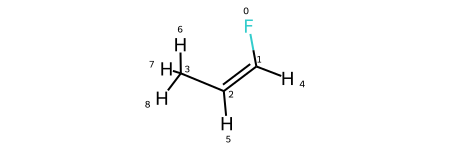

In [43]:
#Creación de la molécula cis
cis = "F\C=C/C"
molcis = Chem.MolFromSmiles(cis)
molcis = Chem.AddHs(molcis)
Chem.AllChem.EmbedMolecule(molcis,useRandomCoords=False, randomSeed = 0)
Chem.MolToXYZFile(molcis, "cis.xyz")
molcis



In [58]:
#Coordenadas tridimensionales de la molécula cis
print(Chem.MolToMolBlock(molcis))




     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    1.8305    0.3593    1.3254 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.3387    0.2597    0.0642 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2897   -0.5332   -0.1283 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0945    0.0386    0.0001 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7796    0.8033   -0.7604 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3873   -1.5817   -0.3755 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1079    0.9612    0.5979 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5550    0.1827   -1.0022 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7022   -0.7621    0.4954 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END



**Estructura trans**

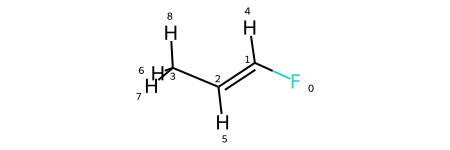

In [45]:
#Creación de la molécula trans

trans = "F/C=C/C"

moltrans = Chem.MolFromSmiles(trans)
moltrans = Chem.AddHs(moltrans)
Chem.AllChem.EmbedMolecule(moltrans,useRandomCoords=False, randomSeed = 0)
Chem.MolToXYZFile(moltrans, "trans.xyz")
moltrans


In [46]:
#Coordenadas tridimensionales de la molécula trans
print(Chem.MolToMolBlock(moltrans))



     RDKit          3D

  9  8  0  0  0  0  0  0  0  0999 V2000
    2.5649   -0.3061   -0.0489 F   0  0  0  0  0  0  0  0  0  0  0  0
    1.3328    0.2499    0.0660 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2386   -0.4721   -0.0911 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1317    0.0993    0.0266 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1799    1.3123    0.2920 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3634   -1.5375   -0.3179 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5815   -0.0624    1.0155 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7739   -0.4389   -0.7253 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1924    1.1555   -0.2168 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  2  5  1  0
  3  6  1  0
  4  7  1  0
  4  8  1  0
  4  9  1  0
M  END



**Ángulo diedro = 90°**

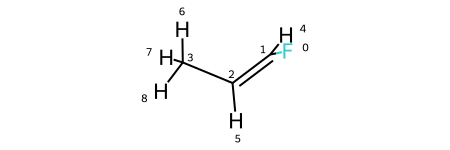

In [47]:
#Creación de la molécula con angúlo diedro de 90°

Chem.AllChem.SetDihedralDeg(molcis.GetConformer(0),3,2,1,0,90.0)
Chem.MolToXYZFile(molcis, "diedro90.xyz")
molcis

In [48]:
#Coordenadas tridimensionales del diedro de 90°
!cat diedro90.xyz


9

F      1.830527    0.359296    1.325414
C      1.338691    0.259661    0.064198
C      0.289688   -0.533197   -0.128255
C     -1.094549    0.038552    0.000072
H      1.779554    0.803276   -0.760384
H      0.387270   -1.581715   -0.375521
H     -1.107893    0.961223    0.597892
H     -1.554987    0.182709   -1.002230
H     -1.702249   -0.762072    0.495392


#**Cálculo de energía de las estructuras moleculares**

**Energía del isómero Cis**

In [49]:
cis = gto.M(atom="cis.xyz")


cis.basis = "6-31G"
mf_cis = cis.KS()
mf_cis.xc = 'b3lyp'


resultado_cis = mf_cis.kernel()
resultado_cis


converged SCF energy = -214.252548921211


-214.2525489212108

**Energía del isómero Trans**

In [50]:
trans = gto.M(atom="trans.xyz")


trans.basis = "6-31G"
mf_trans = trans.KS()
mf_trans.xc = 'b3lyp'


resultado_trans = mf_trans.kernel()
resultado_trans

converged SCF energy = -214.252529284339


-214.25252928433872

**Energía del diedro de 90°**

In [53]:
diedro = gto.M(atom="diedro90.xyz")


diedro.basis = "6-31G"
mf_diedro = diedro.KS()
mf_diedro.xc = 'b3lyp'


resultado_diedro = mf_diedro.kernel()
resultado_diedro

converged SCF energy = -214.083985929233


-214.083985929233

#**Gráfica de las energías**

  Cloning https://github.com/giacomomarchioro/PyEnergyDiagrams to /tmp/pip-req-build-irjv13e7
  Running command git clone --filter=blob:none --quiet https://github.com/giacomomarchioro/PyEnergyDiagrams /tmp/pip-req-build-irjv13e7
  Resolved https://github.com/giacomomarchioro/PyEnergyDiagrams to commit 3d6086564aa99aa0a0f3db4a510b736015562d5c
  Preparing metadata (setup.py) ... done


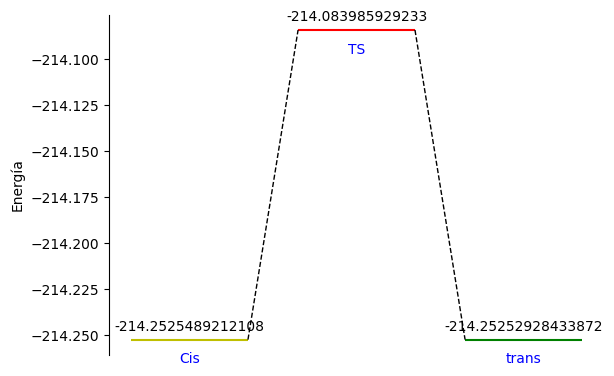

In [54]:
!pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams


import matplotlib.pyplot as plt
from energydiagram import ED


diagram = ED()
diagram.add_level(resultado_cis,'Cis',color='y')
diagram.add_level(resultado_diedro,'TS',color='r')
diagram.add_level(resultado_trans,'trans',color='g')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energía")

#**Energía de activación**

In [56]:
E_activacion = resultado_diedro - resultado_cis
E_activacion

0.168562991977808

#**Determinación de la entalopía**

In [57]:
entalpia = resultado_trans - resultado_cis
if entalpia>0:
  print("La reacción es endotérmica")
else:
    print("La reacción es exotérmica")

La reacción es endotérmica
